In [9]:
from __init__ import get_parent_path
import sys
import os
parentPath = get_parent_path()
parentPath += os.path.sep + "src"
if not parentPath in sys.path:
    sys.path.insert(1, parentPath)

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

from scipy.spatial import distance as dist

from sklearn.metrics.pairwise import cosine_similarity

from shutil import rmtree, move

from PIL import Image

import numpy as np

import matplotlib.pyplot as plt

from getData import import_data

In [2]:
model = tf.keras.models.load_model("../models/InceptionV3--v1.h5")

In [ ]:
# # Simulate data on production
# IMG_PER_CLASS = 10
# base_dir = os.path.join('..', 'input', 'val')
# data_path = []
# for _dir in os.listdir(base_dir):
#     data = np.random.permutation(os.listdir(os.path.join(base_dir, _dir)))
#     data = [os.path.join(base_dir, _dir, x) for x in data[:IMG_PER_CLASS]]
#     data_path.extend(data)

# prod_dir = os.path.join('..', 'input', 'prod')
# if os.path.isdir(prod_dir):
#     rmtree(prod_dir)
# os.mkdir(prod_dir)
# [move(x, os.path.join(prod_dir, os.path.split(x)[-1])) for x in data_path]


# img = Image.open('..\\input\\prod\\00000992.jpg')
# img = img.resize((224,224))
# img = np.expand_dims(np.array(img), 0)
# pred = model.predict(img, verbose=0)

In [13]:
trainSet = import_data('train')
keys = list(trainSet.class_indices.keys())
values = list(trainSet.class_indices.values())

Found 4024 images belonging to 5 classes.


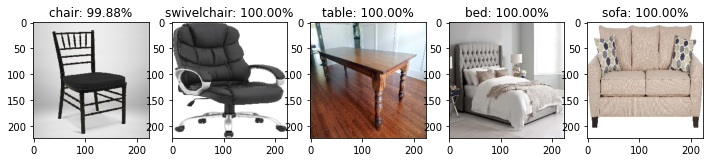

In [17]:
AMOUNT_DOWNLOADED_IMAGES = 5
plt.figure(figsize=(12,12))
for i in range(AMOUNT_DOWNLOADED_IMAGES):
    img = image.load_img(f'..\\input\\download{i}.jpg', target_size=(224,224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data1 = preprocess_input(img_data)
    pred = model.predict(img_data1, verbose=0)

    label = keys[values[np.argmax(pred.squeeze())]]
    precision = np.argmax(pred.squeeze())
    plt.subplot(1, AMOUNT_DOWNLOADED_IMAGES, i+1)
    plt.title(f"{label}: {np.max(pred.squeeze())*100:.2f}%")
    plt.imshow(img)